# Principal Coordinates Analysis for MS1 Data Matrix (i.e. MS1 Feature Table)
 __Author:__ Alan K. Jarmusch <br>
 __Verion:__ 1.0 <br>
 __Date of Last Revision:__ 02-20-2018 <br>
 __Input:__ Data matrix with metadata (.csv), samples (row) by variables (columns). Data should be normalized but not centered.

In [1]:
suppressMessages(library(pcaMethods))
suppressMessages(library(ggplot2))
suppressMessages(library(Hmisc))
suppressMessages(library(grid))
suppressMessages(library(gridExtra))
suppressMessages(library(dplyr))
suppressMessages(library(tidyr))

In [2]:
df <- read.csv("Analysis_Matrix/20180702_Immunosuppressant15Skin_MS1DataMatrix_RowSumNorm.csv", header=TRUE)

In [3]:
dim(df)

[1]   298 20688

In [4]:
df[1:5,1:25]

filename,unique_sample_ID,unique_sample_ID.1,ATTRIBUTE_sample_ID,ATTRIBUTE_Meds_number,ATTRIBUTE_prescribed_acetaminophen,ATTRIBUTE_prescribed_albuterol,ATTRIBUTE_prescribed_allopurinol,ATTRIBUTE_prescribed_amlodipine,ATTRIBUTE_prescribed_aspirin,⋯,ATTRIBUTE_prescribed_budesonide,ATTRIBUTE_prescribed_calcitriol,ATTRIBUTE_prescribed_calcium.carbonate,ATTRIBUTE_prescribed_cephalexin,ATTRIBUTE_prescribed_cholecalciferol,ATTRIBUTE_prescribed_cinacalcet,ATTRIBUTE_prescribed_citalopram,ATTRIBUTE_prescribed_clonidine,ATTRIBUTE_prescribed_conjugated.estrogens,ATTRIBUTE_prescribed_dapsone
AA3594_1_1_RA1_01_37666.mzXML,AA3594_1_1_RA1,AA3594_1_1,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,0,0,0,1,0,0
AA3594_1_10_RA10_01_37671.mzXML,AA3594_1_10_RA10,AA3594_1_10,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,0,0,0,1,0,0
AA3594_1_2_RA2_01_37667.mzXML,AA3594_1_2_RA2,AA3594_1_2,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,0,0,0,1,0,0
AA3594_1_3_RA3_01_37668.mzXML,AA3594_1_3_RA3,AA3594_1_3,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,0,0,0,1,0,0
AA3594_1_4_RA4_01_37669.mzXML,AA3594_1_4_RA4,AA3594_1_4,AA3594,22,0,0,1,0,0,⋯,0,0,0,0,0,0,0,1,0,0


In [5]:
#result <- merge(met, df,  by.x = 'Sample.ID', by.y = 'Sample.name')
#result[1:5,1:10]
ids <- as.character(df[,which(colnames(df)==c("ATTRIBUTE_sample_ID"))])
head(ids)

[1] "AA3594" "AA3594" "AA3594" "AA3594" "AA3594" "AA3594"

In [6]:
# scale options c("none", "pareto", "vector", "uv")
mypca <- pca(df[,-c(1:125)], method="nipals", center=TRUE, nPcs = 5, scale = "pareto")

Warning message in prep(Matrix, scale = scale, center = center, simple = FALSE, :
“Variance is below eps for 29 variables. Not scaling them.”

In [7]:
df <- cbind(scores(mypca),df)
#head(df)
loadings <- as.data.frame(loadings(mypca))
rownames <- rownames(loadings)
loadings <- cbind(rownames,loadings)
rownames(loadings) <- NULL
head(loadings)
test_loading_names <- loadings
test_loading_names <- cbind(substr(test_loading_names$rownames, 0, 9),loadings)
colnames(test_loading_names)[1] <- "mz"

test_loading_names <- 
    separate(test_loading_names, col="mz", remove= TRUE, "X", into=c("xfactor","mz"))
head(test_loading_names)

rownames,PC1,PC2,PC3,PC4,PC5
X270.2790906.7.59572526,0.01308362,0.12895194,0.06989463,0.20027287,0.07193889
X242.2840672.6.311871181,0.01969753,0.20621542,0.11138503,0.32838082,0.14062707
X247.1666026.9.968507843,0.00215435,0.03920702,0.01941498,0.05358993,0.02202827
X559.5164608.8.685266469,0.01777126,0.19873640,0.10702188,0.30334208,0.10663543
X537.5346088.8.685099383,0.01605181,0.16060284,0.08763964,0.24869748,0.08622831
X284.2949516.8.424285662,0.03395994,-0.01657213,0.01408039,0.03354788,-0.00256814


xfactor,mz,rownames,PC1,PC2,PC3,PC4,PC5
,270.2790,X270.2790906.7.59572526,0.01308362,0.12895194,0.06989463,0.20027287,0.07193889
,242.2840,X242.2840672.6.311871181,0.01969753,0.20621542,0.11138503,0.32838082,0.14062707
,247.1666,X247.1666026.9.968507843,0.00215435,0.03920702,0.01941498,0.05358993,0.02202827
,559.5164,X559.5164608.8.685266469,0.01777126,0.19873640,0.10702188,0.30334208,0.10663543
,537.5346,X537.5346088.8.685099383,0.01605181,0.16060284,0.08763964,0.24869748,0.08622831
,284.2949,X284.2949516.8.424285662,0.03395994,-0.01657213,0.01408039,0.03354788,-0.00256814


Saving 7.1 x 6.67 in image


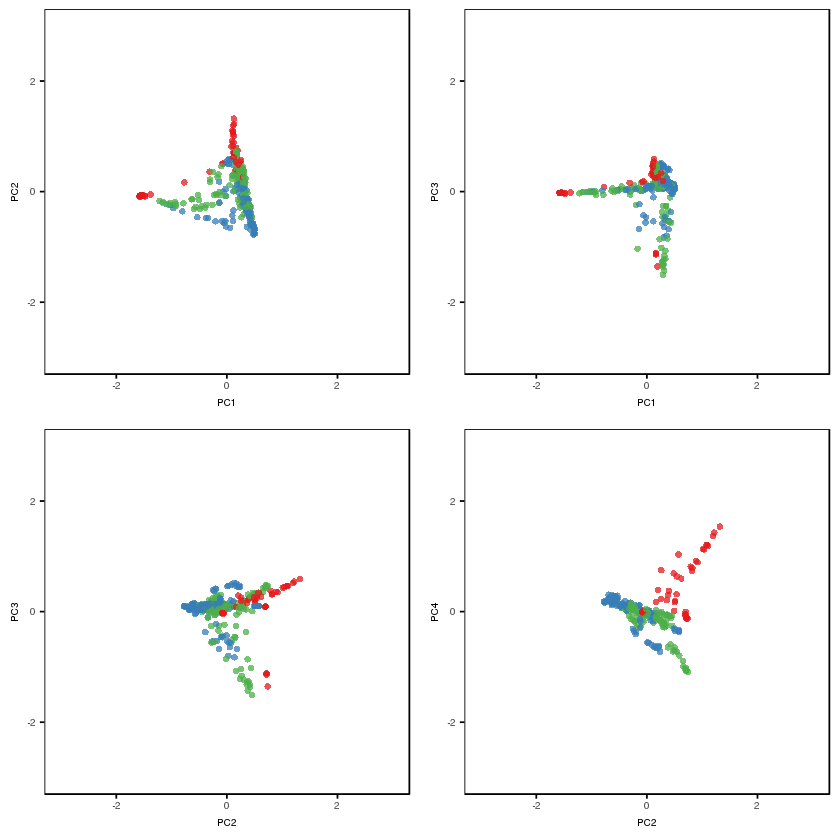

In [8]:
BODYSITE_score_1v2 <- ggplot(df, aes(PC1, PC2))+
    geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#e41a1c","#377eb8","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_1v2 <- BODYSITE_score_1v2 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_score_1v3 <- ggplot(df, aes(PC1, PC3))+
    geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#e41a1c","#377eb8","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_1v3 <- BODYSITE_score_1v3 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_score_2v3 <- ggplot(df, aes(PC2, PC3))+
    geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#e41a1c","#377eb8","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_2v3 <- BODYSITE_score_2v3 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_score_2v4 <- ggplot(df, aes(PC2, PC4))+
    geom_point(aes(colour=factor(ATTRIBUTE_Sample_Location_General_Text)), pch=16,alpha=0.75) +
    scale_color_manual(values= c("#e41a1c","#377eb8","#4daf4a")) +
    xlim(-3,3) +
    ylim(-3,3) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_score_2v4 <- BODYSITE_score_2v4 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())


PCA_score <- grid.arrange(BODYSITE_score_1v2,BODYSITE_score_1v3,BODYSITE_score_2v3,BODYSITE_score_2v4,ncol=2, nrow=2)
ggsave("Plots/20180702_Immunosuppressant15Skin_MS1_PCA_Score.pdf", PCA_score, width=7.1, units="in", scale=1)

Saving 7.1 x 6.67 in image


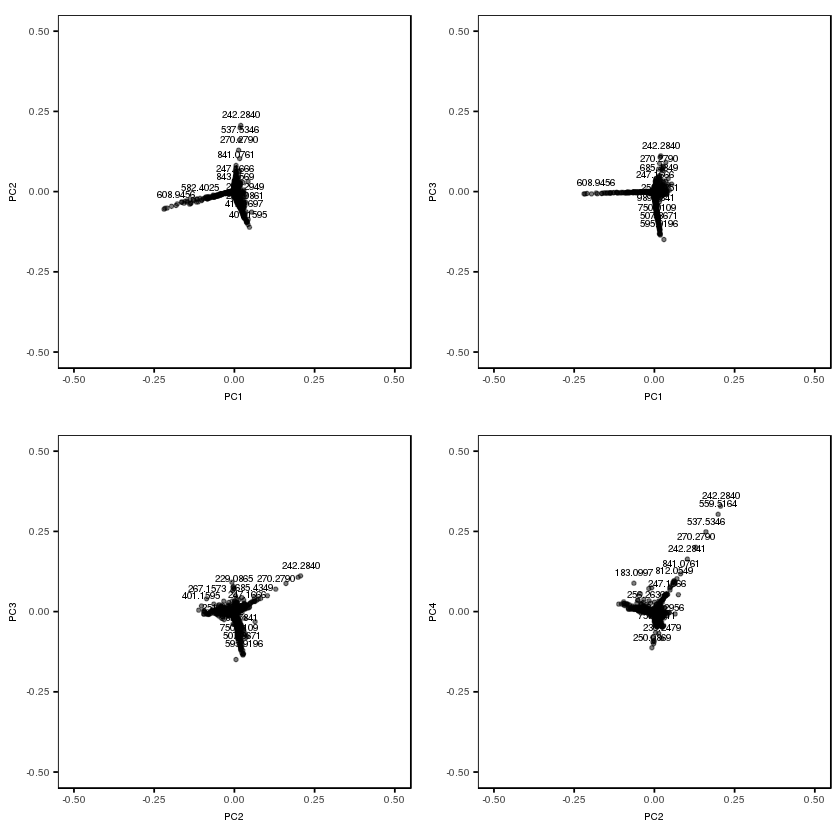

In [9]:
BODYSITE_loading_1v2 <- ggplot(test_loading_names, aes(PC1, PC2, label=mz))+
    geom_point(pch=20,alpha=0.5)+
    geom_text(check_overlap = TRUE, size = 2, vjust = -1) +
    xlim(-0.5,0.5) +
    ylim(-0.5,0.5) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_loading_1v2 <- BODYSITE_loading_1v2 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_loading_1v3 <- ggplot(test_loading_names, aes(PC1, PC3, label=mz))+
    geom_point(pch=20,alpha=0.5)+
    geom_text(check_overlap = TRUE, size = 2, vjust = -1) +
    xlim(-0.5,0.5) +
    ylim(-0.5,0.5) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_loading_1v3 <- BODYSITE_loading_1v3 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_loading_2v3 <- ggplot(test_loading_names, aes(PC2, PC3, label=mz))+
    geom_point(pch=20,alpha=0.5)+
    geom_text(check_overlap = TRUE, size = 2, vjust = -1) +
    xlim(-0.5,0.5) +
    ylim(-0.5,0.5) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_loading_2v3 <- BODYSITE_loading_2v3 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())

BODYSITE_loading_2v4 <- ggplot(test_loading_names, aes(PC2, PC4, label=mz))+
    geom_point(pch=20,alpha=0.5)+
    geom_text(check_overlap = TRUE, size = 2, vjust = -1) +
    xlim(-0.5,0.5) +
    ylim(-0.5,0.5) +
    theme_minimal()+
            theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
                panel.border = element_rect(linetype = "solid", fill = NA),
               axis.ticks=element_line(colour ="black",size=0.5, linetype="solid"),
                   axis.text=element_text(size=6),
                    axis.title=element_text(size=6)) +
    theme(aspect.ratio=1)
   
BODYSITE_loading_2v4 <- BODYSITE_loading_2v4 + coord_fixed(ratio=1) +
    theme(legend.position="none", legend.text = element_text(colour="black", size = 8), 
          legend.title = element_blank())


PCA_loading <- grid.arrange(BODYSITE_loading_1v2,BODYSITE_loading_1v3,BODYSITE_loading_2v3,BODYSITE_loading_2v4,ncol=2, nrow=2)
ggsave("Plots/20180702_Immunosuppressant15Skin_MS1_PCA_Loading.pdf", PCA_loading, width=7.1, units="in", scale=1)

# END of Notebook